In [1]:
import os
import acoular
from pylab import figure, plot, axis, imshow, colorbar, show
import h5py
import numpy as np
import scipy.io.wavfile as wav

In [2]:
# current_directory = os.path.dirname(os.path.abspath(__file__))
# records_directory = os.path.join(current_directory,'recorder_output', 'records')
input_wav_file='c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.wav'
# Input audio file (WAV)
# input_wav_file = os.path.join(records_directory, 'audio.wav')

# Output HDF5 file
# output_h5_file = os.path.join(records_directory, 'audio.h5')
output_h5_file = 'c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.h5'
print(input_wav_file)
print(output_h5_file)

c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.wav
c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.h5


In [3]:
sample_rate, audio_data = wav.read(input_wav_file)
sample_freq=sample_rate
# Create an HDF5 file
with h5py.File(output_h5_file, 'w') as hf:
    # Create a dataset to store audio data
    hf.create_dataset('/time_data', data=audio_data, dtype=np.int16)

    # Add attribute for sample rate
    hf['/time_data'].attrs['sample_freq'] = sample_freq


In [4]:
import soundfile as sf

# Path to your audio file
audio_file = 'c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.wav'

# Open the audio file
data, samplerate = sf.read(audio_file)

# Check the number of channels
num_channels = data.shape[1] if len(data.shape) > 1 else 1
print("Number of channels:", num_channels)


Number of channels: 16


In [5]:
import h5py

# Path to your HDF5 audio file
h5_file = 'c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.h5'

# Open the HDF5 file in read mode
with h5py.File(h5_file, 'r') as f:
    # Check if the '/time_data' dataset exists
    if '/time_data' in f:
        print("Dataset '/time_data' exists in the HDF5 file.")
    else:
        print("Dataset '/time_data' does not exist in the HDF5 file.")

Dataset '/time_data' exists in the HDF5 file.


In [6]:

micgeofile = 'C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/xml/microphone.xml'

mg = acoular.MicGeom( from_file=micgeofile )


# Check the number of microphones
num_mics = mg.num_mics
print("Number of microphones:", num_mics)



Number of microphones: 16


In [7]:
# micgeofile = os.path.join(os.path.split(acoular.__file__)[0], 'xml', 'minidsp_uma16.xml')
# datafile = output_h5_file

# mg = acoular.MicGeom( from_file=micgeofile )
# ts = acoular.TimeSamples( name=datafile )
# ps = acoular.PowerSpectra( time_data=ts, block_size=128, window='Hanning' )
# rg = acoular.RectGrid( x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01 )
# st = acoular.SteeringVector( grid = rg, mics=mg )
# bb = acoular.BeamformerBase( freq_data=ps, steer=st )
# pm = bb.synthetic( 8000, 3 )
# Lm = acoular.L_p( pm )

# Define the paths to the microphone geometry file and the HDF5 audio file
# micgeofile = 'c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/xml/minidsp_uma16.xml'
# datafile = 'c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.h5'
datafile = output_h5_file
# Load the microphone geometry
# mg = acoular.MicGeom(from_file=micgeofile)

# Load the time samples from the HDF5 file
ts = acoular.TimeSamples(name=datafile)

# Compute the power spectra
ps = acoular.PowerSpectra(time_data=ts, block_size=128, window='Hanning')

# Define the rectilinear grid
rg = acoular.RectGrid(x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01)

# Define the steering vector
st = acoular.SteeringVector(grid=rg, mics=mg)

# Compute the beamformer base
bb = acoular.BeamformerBase(freq_data=ps, steer=st)

# Compute the synthetic sound field
pm = bb.synthetic(8000, 3)

# Compute the sound pressure level
Lm = acoular.L_p(pm)

[('audio_cache.h5', 1)]
[('audio_cache.h5', 2)]


C:\Users\Hriday Desai\AppData\Local\Temp\ipykernel_9964\3491742435.py:36: Warning: Beamforming result may not have been calculated for all queried frequencies. Check freq_data.ind_low and freq_data.ind_high!
  pm = bb.synthetic(8000, 3)


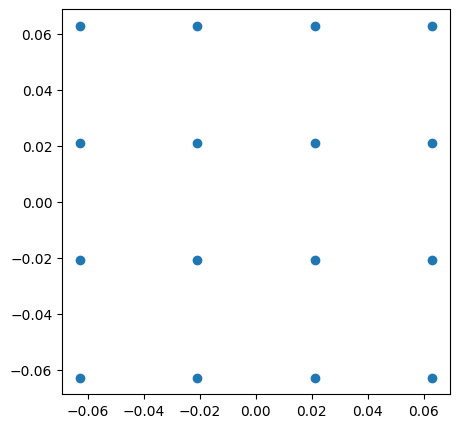

In [8]:
figure(2, figsize=(5,5))
plot(mg.mpos[0], mg.mpos[1],'o')
axis('equal')
show()

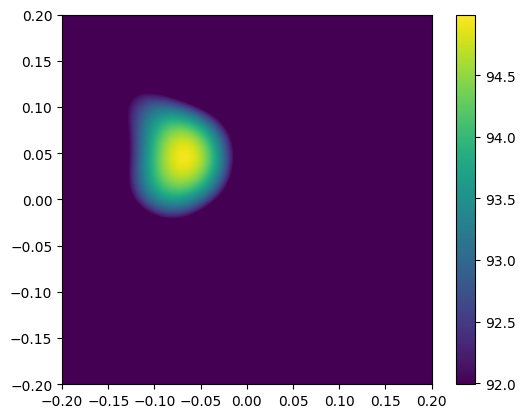

In [9]:
imshow( Lm.T, origin='lower', vmin=Lm.max()-3, \
       extent=rg.extend(), interpolation='bicubic')
colorbar()